In [1]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
from scipy import stats

In [2]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [3]:
ticker=['KIMBERA.MX']
start,end='2016-01-01','2019-02-23'
closes=get_closes(ticker,start,end,freq='d')

In [4]:
ret=np.log(closes/closes.shift()).dropna()
#prueba normalidad
stats.jarque_bera(ret)

(294.5533091125323, 0.0)

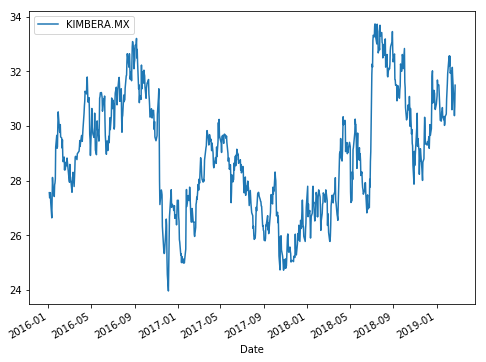

In [5]:
closes.plot(figsize=(8,6))

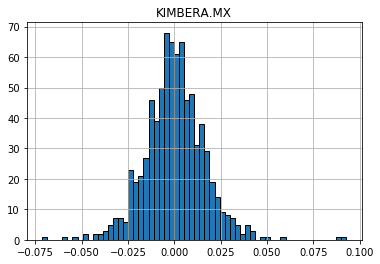

In [6]:
plt.title('KIMBERA.MX')
plt.hist(ret['KIMBERA.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()

In [7]:
a2016=ret.iloc[0:251,]
a2017=ret.iloc[251:502,]
a2018=ret.iloc[502:753,]

### Cambios en los precios


<div class=text-justify> El cambio más significativo se da a finales del 2016, con una caída desde 126 a 203 aproximadamente. Con el pase de los meses se recupera de manera acelerada, para luego iniciar un periodo hasta mediados del 2018 con tendecia negativa. Finalmente, inicia un periodo con tendencia positiva, pero con volatilidades más altas </div>

In [8]:
ret_sum=pd.DataFrame(index=['Rend diario','Rend anual','Vol diaria','Vol anual'],columns=['2016','2017','2018','Todo'])
list=[a2016,a2017,a2018,ret]
for x in range (0,4):
    ret_sum.loc['Rend diario'][ret_sum.columns[x]]=list[x]['KIMBERA.MX'].mean()
    ret_sum.loc['Rend anual'][ret_sum.columns[x]]=list[x]['KIMBERA.MX'].mean()*252
    ret_sum.loc['Vol diaria'][ret_sum.columns[x]]=list[x]['KIMBERA.MX'].std()
    ret_sum.loc['Vol anual'][ret_sum.columns[x]]=list[x]['KIMBERA.MX'].std()*np.sqrt(252)
ret_sum

,2016,2017,2018,Todo
Rend diario,-4.06183e-05,-3.77778e-05,0.000521385,0.00016886
Rend anual,-0.0102358,-0.00952,0.131389,0.0425527
Vol diaria,0.0161039,0.0141525,0.0186043,0.0163068
Vol anual,0.255641,0.224664,0.295334,0.258863


### Discusión datos tabla


<div class=text-justify> 2017 es el único año que muestra rendimiento positivo, en general de todo el periodo da .02, que no es muy alto, pero tiene una olatilidad baja del .18. Como se dijo en la gráfica, al final se observa alta volatilidad, como lo dice la tabla en la volatilidad anual en el 2018.  </div>

In [9]:
ret_sum=pd.DataFrame(index=['Mean','Volatility'],columns=ticker)
ret_sum.loc['Mean']=a2018.mean()
ret_sum.loc['Volatility']=a2018.std()
n=1000
for x in range (0,3):
    mu= ret_sum['KIMBERA.MX']['Mean']
    sigma= ret_sum['KIMBERA.MX']['Volatility']
    s0=31.5
    listaepsilon = [np.random.randn() for _ in range(n)]
    epsilons = np.asarray(listaepsilon)
    epsilon = pd.DataFrame(columns = ['Epsilon', 'st1','st10','st30','st252'])
    epsilon['Epsilon']= epsilons
    epsilon['st1']= s0*np.exp((mu*.5*sigma**2)*1+sigma*np.sqrt(1)*epsilons)
    epsilon['st10']= s0*np.exp((mu*.5*sigma**2)*10+sigma*np.sqrt(10)*epsilons)
    epsilon['st30']= s0*np.exp((mu*.5*sigma**2)*30+sigma*np.sqrt(30)*epsilons)
    epsilon['st252']= s0*np.exp((mu*.5*sigma**2)*252+sigma*np.sqrt(252)*epsilons)
    st=pd.DataFrame(index=['Mean','liminf','limsup'],columns=epsilon.columns)
    st.loc['Mean']=epsilon.mean()
    st.loc['liminf']=epsilon.min()
    st.loc['limsup']=epsilon.max()
    st=st.drop('Epsilon',1)
    print(st)
    n=n*10

            st1     st10     st30    st252
Mean    31.5132  31.5785  31.7046  33.0154
liminf  29.5294  25.6797  22.1127  11.2965
limsup  33.8739  39.6365  46.8968  99.8238
            st1     st10     st30    st252
Mean    31.5075  31.5608  31.6745  32.9308
liminf  29.1264  24.5876  20.5094  9.08245
limsup  33.5867  38.5835  44.7599  87.2031
            st1     st10     st30    st252
Mean    31.5045  31.5513  31.6579  32.8801
liminf  29.0043  24.2633  20.0431  8.49676
limsup  34.1658  40.7268  49.1536  114.392
